<a href="https://colab.research.google.com/github/sana9524/Data_Science/blob/main/KNN_Glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA


In [2]:
data=pd.read_csv("/content/glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

<ipython-input-6-d08a0f616a07>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RI',data=outliers,palette='crest',ax=axes[0])
<ipython-input-6-d08a0f616a07>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Na',data=outliers,palette='crest',ax=axes[1])
<ipython-input-6-d08a0f616a07>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Mg',data=outliers,palette='crest',ax=axes[2])
<ipython-input-6-d08a0f616a07>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variab

<Axes: xlabel='Fe'>

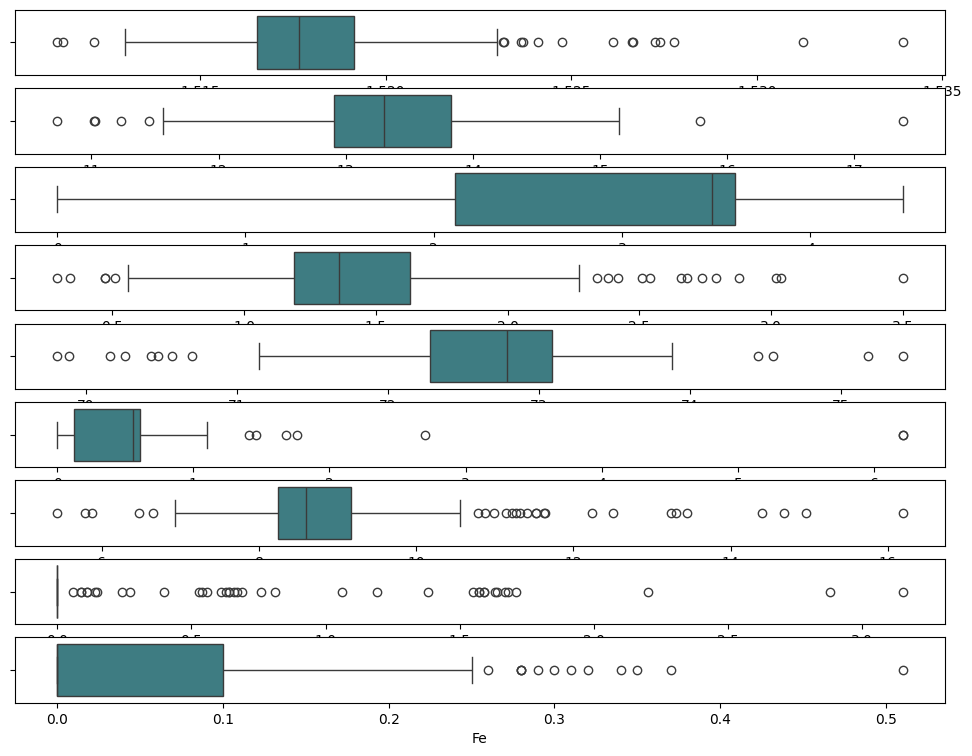

In [6]:
outliers=data.copy()
fig,axes=plt.subplots(9,1,figsize=(12,9),sharex=False,sharey=False)
sns.boxplot(x='RI',data=outliers,palette='crest',ax=axes[0])
sns.boxplot(x='Na',data=outliers,palette='crest',ax=axes[1])
sns.boxplot(x='Mg',data=outliers,palette='crest',ax=axes[2])
sns.boxplot(x='Al',data=outliers,palette='crest',ax=axes[3])
sns.boxplot(x='Si',data=outliers,palette='crest',ax=axes[4])
sns.boxplot(x='K' ,data=outliers,palette='crest',ax=axes[5])
sns.boxplot(x='Ca',data=outliers,palette='crest',ax=axes[6])
sns.boxplot(x='Ba',data=outliers,palette='crest',ax=axes[7])
sns.boxplot(x='Fe',data=outliers,palette='crest',ax=axes[8])

<Axes: >

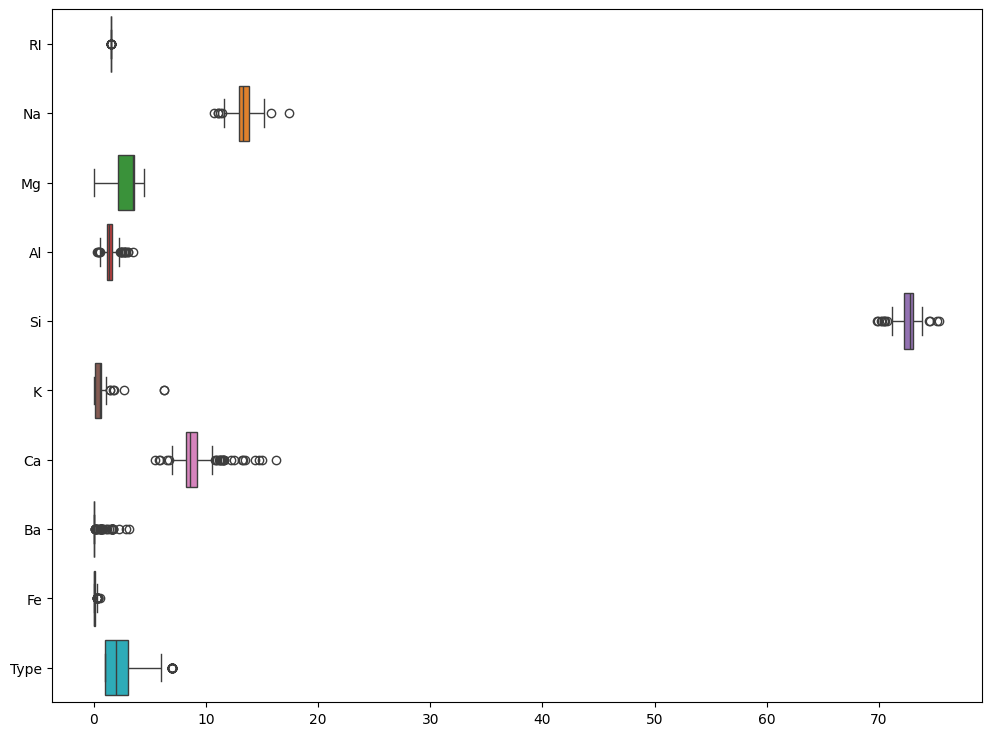

In [7]:
plt.figure(figsize=(12,9))
sns.boxplot(data=data,orient='h')

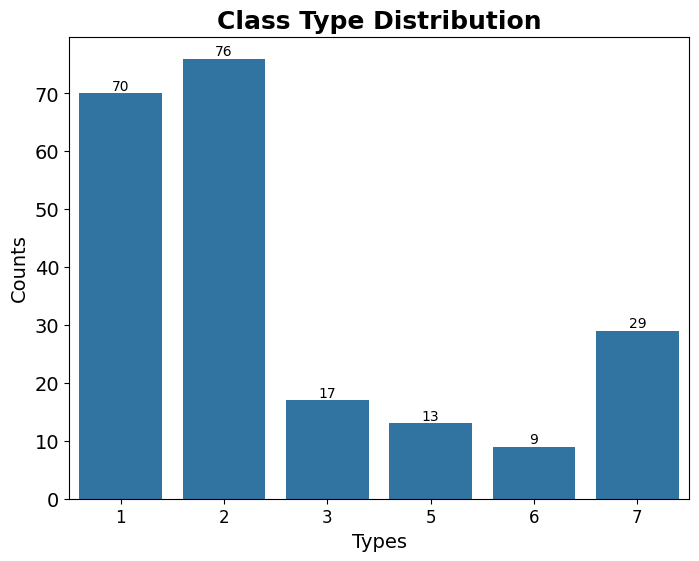

In [8]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x=data['Type'].value_counts().index.tolist(),y=data['Type'].value_counts().tolist())
plt.title('Class Type Distribution',fontsize = 18,fontweight = 'bold')
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 12)
plt.xlabel('Types',fontsize = 14)
plt.ylabel('Counts',fontsize = 14)
for i in ax.containers:
  ax.bar_label (i,)

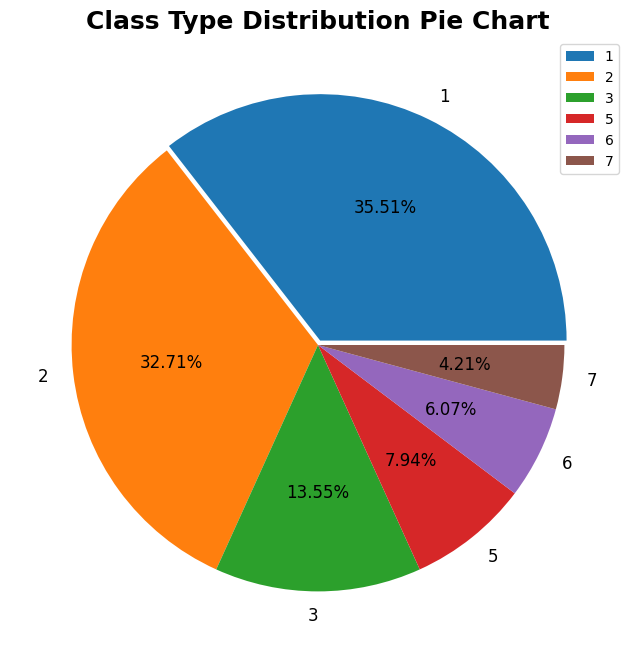

In [9]:
plt.figure(figsize=(10,8))
plt.pie(data['Type'].value_counts(),
        labels=data.Type.unique(),
        explode=[0.02,0.0,0.0,0.0,0.0,0.0],
        autopct='%.2f%%',textprops={'size':'large'})
plt.legend(loc='upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [10]:
data.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [11]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [12]:
X

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [13]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [14]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)


In [15]:
X_train

array([[ 1.51784, 12.68   ,  3.67   , ...,  8.7    ,  0.     ,  0.     ],
       [ 1.51789, 13.19   ,  3.9    , ...,  8.44   ,  0.     ,  0.28   ],
       [ 1.51687, 13.23   ,  3.54   , ...,  8.1    ,  0.     ,  0.     ],
       ...,
       [ 1.51708, 13.72   ,  3.68   , ...,  7.88   ,  0.     ,  0.     ],
       [ 1.52667, 13.99   ,  3.7    , ...,  9.82   ,  0.     ,  0.1    ],
       [ 1.51321, 13.     ,  0.     , ...,  6.93   ,  0.     ,  0.     ]])

In [16]:
X_test

array([[1.51727e+00, 1.47000e+01, 0.00000e+00, 2.34000e+00, 7.32800e+01,
        0.00000e+00, 8.95000e+00, 6.60000e-01, 0.00000e+00],
       [1.51797e+00, 1.27400e+01, 3.48000e+00, 1.35000e+00, 7.29600e+01,
        6.40000e-01, 8.68000e+00, 0.00000e+00, 0.00000e+00],
       [1.51640e+00, 1.25500e+01, 3.48000e+00, 1.87000e+00, 7.32300e+01,
        6.30000e-01, 8.08000e+00, 0.00000e+00, 9.00000e-02],
       [1.51905e+00, 1.40000e+01, 2.39000e+00, 1.56000e+00, 7.23700e+01,
        0.00000e+00, 9.57000e+00, 0.00000e+00, 0.00000e+00],
       [1.52369e+00, 1.34400e+01, 0.00000e+00, 1.58000e+00, 7.22200e+01,
        3.20000e-01, 1.22400e+01, 0.00000e+00, 0.00000e+00],
       [1.51590e+00, 1.30200e+01, 3.58000e+00, 1.51000e+00, 7.31200e+01,
        6.90000e-01, 7.96000e+00, 0.00000e+00, 0.00000e+00],
       [1.51841e+00, 1.30200e+01, 3.62000e+00, 1.06000e+00, 7.23400e+01,
        6.40000e-01, 9.13000e+00, 0.00000e+00, 1.50000e-01],
       [1.51711e+00, 1.28900e+01, 3.62000e+00, 1.57000e+00, 7.

In [17]:
y_test

array([7, 1, 2, 6, 5, 2, 2, 2, 1, 2, 1, 2, 3, 2, 2, 7, 2, 1, 3, 3, 5, 2,
       7, 7, 2, 1, 7, 1, 2, 2, 1, 1, 2, 2, 2, 3, 1, 3, 2, 7, 2, 6, 2])

In [18]:
y_train

array([1, 2, 2, 1, 2, 1, 2, 1, 2, 7, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1, 2, 1,
       2, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 1, 7, 1, 2, 6, 3, 2, 7, 3, 2, 2,
       1, 1, 2, 7, 1, 1, 3, 7, 7, 2, 1, 1, 1, 2, 7, 1, 1, 2, 2, 7, 7, 7,
       3, 2, 1, 2, 2, 5, 7, 1, 2, 1, 2, 2, 2, 1, 3, 1, 1, 1, 1, 2, 7, 1,
       2, 2, 2, 5, 7, 1, 1, 2, 2, 7, 5, 6, 6, 5, 2, 6, 1, 2, 2, 1, 1, 1,
       1, 2, 5, 1, 2, 2, 7, 1, 1, 2, 1, 7, 2, 1, 1, 2, 5, 3, 1, 6, 2, 7,
       1, 5, 2, 6, 3, 1, 6, 2, 2, 5, 2, 2, 3, 7, 2, 2, 1, 5, 2, 7, 5, 7,
       1, 7, 1, 2, 2, 2, 2, 1, 1, 1, 2, 7, 1, 7, 2, 1, 5])

In [19]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)


In [20]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [21]:
y_pred = knn.predict(X_test)
y_pred

array([7, 1, 2, 6, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 7, 1, 2, 1, 2, 5, 1,
       7, 7, 1, 1, 7, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 7, 2, 2, 2])

In [22]:

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6046511627906976
Classification Report:
               precision    recall  f1-score   support

           1       0.39      0.78      0.52         9
           2       0.65      0.58      0.61        19
           3       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         2
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         6

    accuracy                           0.60        43
   macro avg       0.67      0.56      0.58        43
weighted avg       0.60      0.60      0.58        43

